In [147]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [148]:
data = pd.read_csv('clean_data.csv')

In [149]:
data

,Unnamed: 0,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
0,0,100-CI-T01,Côte d'Ivoire,PMO - US,0,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,...,241.243885,2006,6,2,2006,6,2,2006,6,2
1,1,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,...,241.243885,2006,11,14,2006,11,14,2006,11,14
2,2,100-CI-T01,Côte d'Ivoire,PMO - US,0,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,...,241.243885,2006,8,27,2006,8,27,2006,8,27
3,3,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,...,241.243885,2006,9,1,2006,9,1,2006,9,1
4,4,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,...,241.243885,2006,8,11,2006,8,11,2006,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,9959,103-ZW-T30,Zimbabwe,PMO - US,1,N/A - From RDC,Truck,ARV,Pediatric,SCMS from RDC,...,705.790000,2015,7,31,2015,7,15,2015,7,20
9960,9960,104-CI-T30,Côte d'Ivoire,PMO - US,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,...,161.710000,2015,7,31,2015,8,6,2015,8,7
9961,9961,110-ZM-T30,Zambia,PMO - US,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,...,5284.040000,2015,8,31,2015,8,25,2015,9,3
9962,9962,200-ZW-T30,Zimbabwe,PMO - US,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,...,134.030000,2015,9,9,2015,8,4,2015,8,11


In [150]:
def x(df, label_mapping):
     # One-hot encoding
    for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
        
    # Split df into X and y
    y = df['Shipment Mode']
    X = df.drop('Shipment Mode', axis=1)
    
    # Encode the labels
    y = y.replace(label_mapping)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
        
        

In [151]:
LABEL_MAPPING = {
    'Air': 1,
    'Truck': 2,
    'Air Charter': 3,
    'Ocean': 4
}

X_train, X_test, y_train, y_test = x(data, label_mapping=LABEL_MAPPING)

In [152]:
X_train

,Unnamed: 0,Fulfill Via,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery Date Year,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
8905,1.362532,0.975074,-0.228739,-0.426393,-0.442833,-0.365576,-0.221030,0.673216,-0.471452,1.087860,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1414,-1.239390,0.975074,-0.228739,0.198248,0.418854,-0.218907,-0.172736,0.673216,0.702302,-0.994006,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1409,-1.241127,0.975074,-0.228739,0.532553,0.366882,-0.309884,-0.203468,0.673216,0.632237,-0.994006,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,4.125612,-0.197963,-0.011975,-0.023956
874,-1.426954,-1.025563,0.291362,-0.450154,-0.274234,2.493413,0.354098,0.673216,-0.278564,-1.410379,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,5.051446,-0.011975,-0.023956
1941,-1.056342,0.975074,-0.618816,0.159722,0.338381,-0.227409,-0.093711,0.673216,0.593803,-0.994006,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.724980,-1.025563,-0.228739,-0.407975,-0.436590,-0.377267,-0.225420,-1.485408,-0.467031,1.087860,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
7813,0.983237,0.975074,-0.228739,-0.005566,-0.331187,-0.409364,-0.238591,0.673216,-0.358993,0.255114,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
905,-1.416186,-1.025563,-0.618816,1.611276,2.247912,-0.223796,-0.093711,0.673216,2.497515,-1.410379,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
5192,0.072859,-1.025563,0.291362,-0.281635,1.413370,1.430592,0.134584,0.673216,2.296044,-0.577633,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956


In [153]:
y_train.value_counts()

1    4317
2    1950
3     449
4     258
Name: Shipment Mode, dtype: int64

In [154]:
X_train.shape

(6974, 772)

# Training:

In [155]:
inputs = tf.keras.Input(shape=(772,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.8346 - val_loss: 0.3329 - val_accuracy: 0.8717
Epoch 2/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2365 - accuracy: 0.9036 - val_loss: 0.3345 - val_accuracy: 0.8703
Epoch 3/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2039 - accuracy: 0.9141 - val_loss: 0.3121 - val_accuracy: 0.8717
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.1860 - accuracy: 0.9201 - val_loss: 0.2917 - val_accuracy: 0.8896
Epoch 5/100
175/175 [==============================] - 1s 4ms/step - loss: 0.1667 - accuracy: 0.9265 - val_loss: 0.3169 - val_accuracy: 0.8925
Epoch 6/100
175/175 [==============================] - 1s 4ms/step - loss: 0.1595 - accuracy: 0.9296 - val_loss: 0.3151 - val_accuracy: 0.8918
Epoch 7/100
175/175 [==============================] - 1s 4ms/step - loss: 0.1489 - accuracy: 0.9321 - val_loss: 0.3128 - val_accuracy: 0.8925

# Result:

In [156]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))


print("Classification Report:\n----------------------\n", clr)

94/94 [==============================] - 0s 2ms/step
Test Set Accuracy: 88.13%
Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.91      0.90      0.90      1796
       Truck       0.86      0.87      0.87       880
 Air Charter       0.84      0.87      0.86       201
       Ocean       0.72      0.73      0.73       113

    accuracy                           0.88      2990
   macro avg       0.83      0.84      0.84      2990
weighted avg       0.88      0.88      0.88      2990



# Result HeatMap:

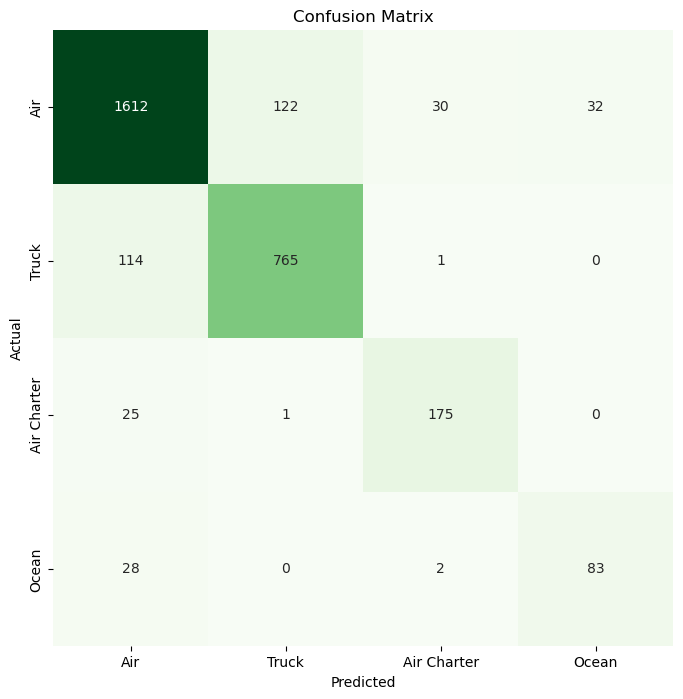

In [157]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()